In [2]:
from tensorflow.python.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# データの大きさを確認
print('x_train.shape :', x_train.shape)
print('x_test.shape  :', x_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape  :', y_test.shape)

x_train.shape : (50000, 32, 32, 3)
x_test.shape  : (10000, 32, 32, 3)
y_train.shape : (50000, 1)
y_test.shape  : (10000, 1)


** リスト5.3:データのスケール変換とクラスラベルの1-hotベクトル化 **


In [4]:
from keras.utils import to_categorical


# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.

# クラスラベルの1-hotベクトル化
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

** リスト5.4:モデル構築の準備 **

In [5]:
from tensorflow.python.keras.models import Sequential

model = Sequential()

** リスト5.5:畳み込み層の追加 **

In [6]:
from tensorflow.python.keras.layers import Conv2D

model.add(
    Conv2D(
        filters=32,
        input_shape=(32, 32, 3),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

** リスト5.6:プーリング層の追加 **

In [7]:
from tensorflow.python.keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=(2, 2)))

** リスト5.7:ドロップアウトレイヤーの追加 **

In [8]:
from tensorflow.python.keras.layers import Dropout

model.add(Dropout(0.25))

** リスト5.8:畳み込み層とプーリング層の追加 **

In [9]:
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

** リスト5.9:プーリング層追加後のモデルの出力形式 **

In [10]:
model.output_shape

(None, 8, 8, 64)

** リスト5.10:Flattenレイヤーの追加 **

> インデントされたブロック



In [11]:
from tensorflow.python.keras.layers import Flatten

model.add(Flatten())
model.output_shape

(None, 4096)

** リスト5.11:全結合層の追加 **

In [12]:
from tensorflow.python.keras.layers import Dense

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

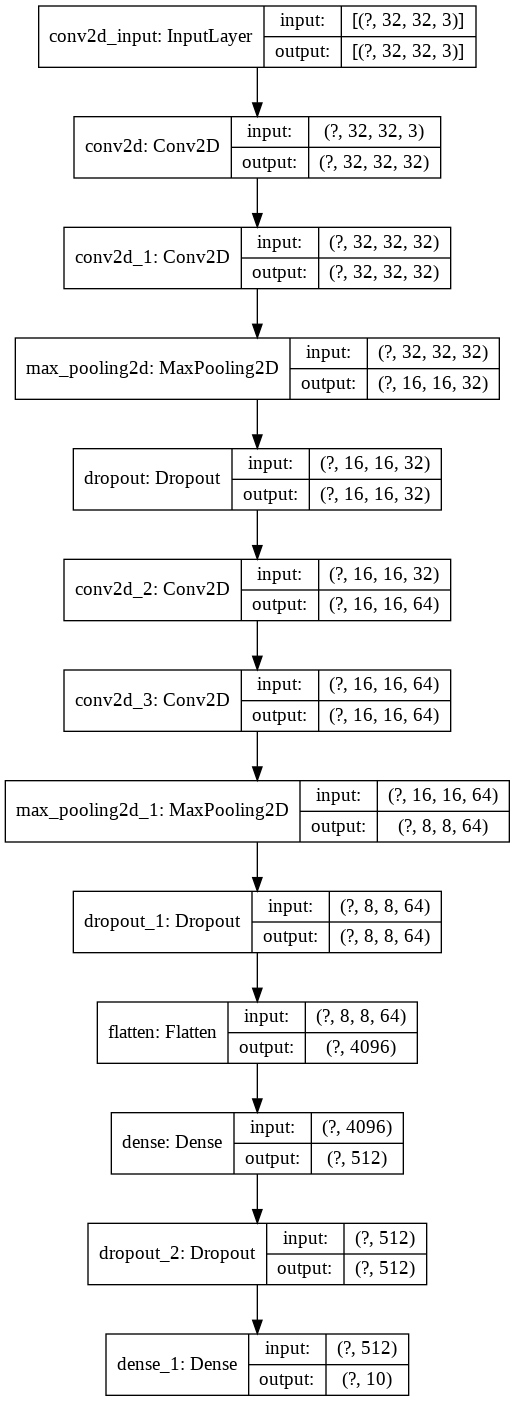

In [13]:
#モデルの図示化
from keras.utils import plot_model
display(plot_model(model,show_shapes=True))

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_model1 = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
)

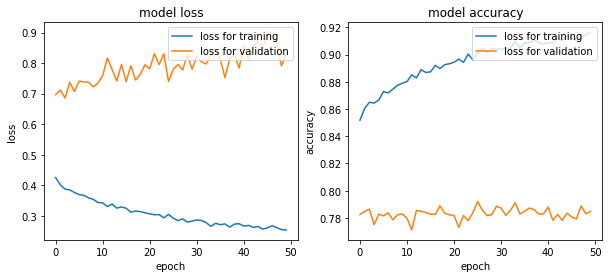

In [18]:
import matplotlib.pyplot as plt
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['accuracy'],label="loss for training")
    axR.plot(fit.history['val_accuracy'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(history_model1)
plot_history_acc(history_model1)

In [20]:
loss,acc = model.evaluate(x_test, y_test, batch_size=128)
print(loss)
print(acc)

79/79 [==============================] - 0s 5ms/step - loss: 0.8762 - accuracy: 0.7796
0.8761962652206421
0.7796000242233276
